<a href="https://colab.research.google.com/github/Vandana-2003/MyPortfolio/blob/main/ML_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
# ==============================================
# STEP 0 : Install Libraries
# ==============================================
!pip install -q pandas numpy scikit-learn matplotlib seaborn nltk praw tqdm

# ==============================================
# STEP 1 : Import Libraries
# ==============================================
import praw
import pandas as pd
import numpy as np
from tqdm import tqdm
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

nltk.download('punkt')
nltk.download('punkt_tab')     # 🔹 Added line (this fixes your LookupError)
nltk.download('stopwords')


# ==============================================
# STEP 2 : Reddit API Setup
# ==============================================
"""
👉 Go to https://www.reddit.com/prefs/apps
   -> Click "create another app"
   -> Choose "script"
   -> Name: fatigue_project
   -> Redirect URI: http://localhost
   -> Copy client_id and client_secret
"""

reddit = praw.Reddit(
    client_id="jD8CpBqt9K6naOpzXQ7k3Q",        # 🔹 Replace this
    client_secret="r2F3RW0XUJAmaX-okoFQb4A4HXzJVA",# 🔹 Replace this
    user_agent="fatigue_detection_app"
)

# ==============================================
# STEP 3 : Collect Reddit Posts
# ==============================================
queries = [
    "online learning fatigue",
    "student tired of online class",
    "zoom fatigue students",
    "study burnout",
    "exam stress online learning"
]

all_posts = []

for query in tqdm(queries, desc="Scraping Reddit"):
    for submission in reddit.subreddit("students+college+education").search(query, limit=100):
        text = (submission.title or "") + " " + (submission.selftext or "")
        all_posts.append(text)

df = pd.DataFrame(all_posts, columns=["text"])
print("✅ Total posts collected:", len(df))
df.head()

# ==============================================
# STEP 4 : Auto-Label Data (Fatigue vs Non-Fatigue)
# ==============================================
fatigue_words = ["tired", "sleep", "exhausted", "burnout", "stress", "drained", "fatigue"]
df["label"] = df["text"].apply(
    lambda x: 1 if any(word in x.lower() for word in fatigue_words) else 0
)
print(df["label"].value_counts())

# ==============================================
# STEP 5 : Clean Text
# ==============================================
stop_words = set(stopwords.words("english"))
df["clean_text"] = df["text"].apply(
    lambda x: " ".join(
        [w.lower() for w in nltk.word_tokenize(x)
         if w.isalpha() and w.lower() not in stop_words]
    )
)

# ==============================================
# STEP 6 : Split Data
# ==============================================
X_train, X_test, y_train, y_test = train_test_split(
    df["clean_text"], df["label"], test_size=0.2, random_state=42, stratify=df["label"]
)

# ==============================================
# STEP 7 : TF-IDF Vectorization
# ==============================================
vectorizer = TfidfVectorizer(max_features=3000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# ==============================================
# STEP 8 : Train Model
# ==============================================
model = LogisticRegression(max_iter=200)
model.fit(X_train_vec, y_train)

# ==============================================
# STEP 9 : Evaluate Model
# ==============================================
y_pred = model.predict(X_test_vec)
acc = accuracy_score(y_test, y_pred)
print(f"\n🎯 Accuracy: {acc:.2f}\n")
print("Classification Report:\n", classification_report(y_test, y_pred))

# ==============================================
# STEP 10 : Save Dataset and Model
# ==============================================
df.to_csv("reddit_fatigue_dataset.csv", index=False)
import joblib
joblib.dump(model, "fatigue_model.pkl")
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")
print("✅ Dataset and model saved successfully!")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.3/189.3 kB 10.0 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
Scraping Reddit:   0%|          | 0/5 [00:00<?, ?it/s]WARNING:praw:It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

Scraping Reddit:  20%|██        | 1/5 [00:02<00:10,  2.51s/it]WARNING:praw:It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bo

✅ Total posts collected: 500
label
1    295
0    205
Name: count, dtype: int64

🎯 Accuracy: 0.90

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.80      0.87        41
           1       0.88      0.97      0.92        59

    accuracy                           0.90       100
   macro avg       0.91      0.89      0.89       100
weighted avg       0.90      0.90      0.90       100

✅ Dataset and model saved successfully!


/tmp/ipython-input-664766645.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="label", data=df, palette="coolwarm")


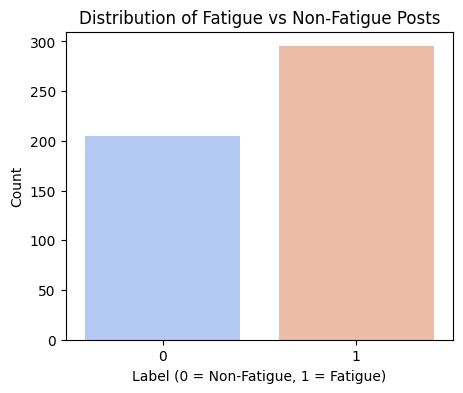

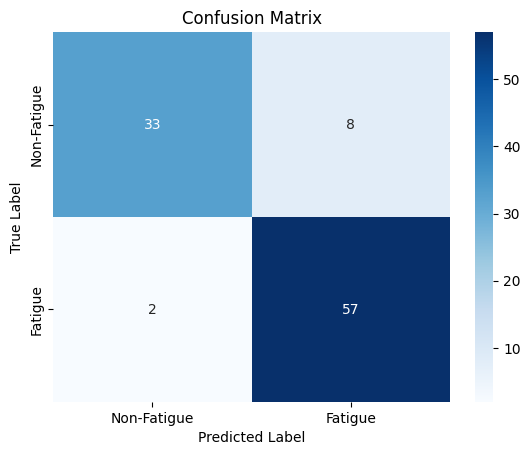

/tmp/ipython-input-664766645.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="magma")


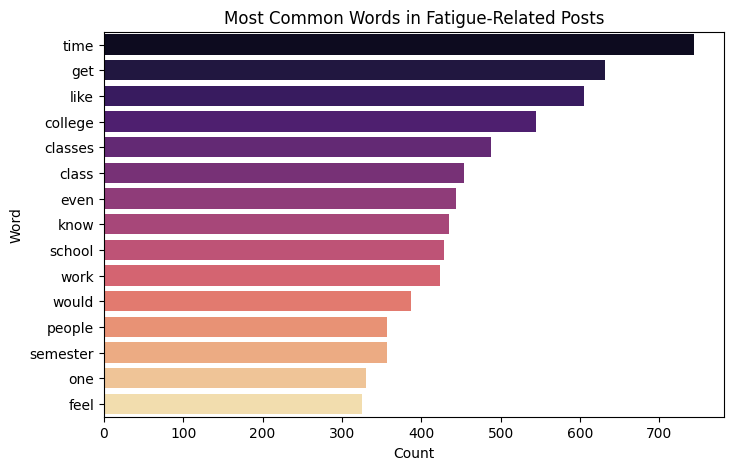

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from collections import Counter
import nltk

# ==============================================
# 1️⃣ Label Distribution
# ==============================================
plt.figure(figsize=(5,4))
sns.countplot(x="label", data=df, palette="coolwarm")
plt.title("Distribution of Fatigue vs Non-Fatigue Posts")
plt.xlabel("Label (0 = Non-Fatigue, 1 = Fatigue)")
plt.ylabel("Count")
plt.show()

# ==============================================
# 2️⃣ Confusion Matrix
# ==============================================
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Non-Fatigue","Fatigue"], yticklabels=["Non-Fatigue","Fatigue"])
plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

# ==============================================
# 3️⃣ Most Common Words in Fatigue Posts
# ==============================================
fatigue_text = " ".join(df[df["label"]==1]["clean_text"])
tokens = nltk.word_tokenize(fatigue_text)
word_freq = Counter(tokens)
common_words = word_freq.most_common(15)

words, counts = zip(*common_words)
plt.figure(figsize=(8,5))
sns.barplot(x=list(counts), y=list(words), palette="magma")
plt.title("Most Common Words in Fatigue-Related Posts")
plt.xlabel("Count")
plt.ylabel("Word")
plt.show()


In [13]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Compute all key metrics
acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"✅ Model Metrics:\nAccuracy: {acc:.2f}\nPrecision: {precision:.2f}\nRecall: {recall:.2f}\nF1-Score: {f1:.2f}")


✅ Model Metrics:
Accuracy: 0.90
Precision: 0.88
Recall: 0.97
F1-Score: 0.92


In [14]:
import joblib
joblib.dump(model, "mental_fatigue_model.pkl")


['mental_fatigue_model.pkl']

In [15]:
import numpy as np
import datetime

# ==============================================
# 1️⃣ Generate Summary
# ==============================================
summary = f"""
==============================================
📘 PROJECT SUMMARY — Mental Fatigue Detection
==============================================
Date: {datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")}

🔹 Dataset Overview:
Total Posts: {len(df)}
Fatigue Posts: {sum(df['label'] == 1)}
Non-Fatigue Posts: {sum(df['label'] == 0)}

🔹 Model Performance:
Accuracy: {acc:.2f}
Precision: {precision:.2f}
Recall: {recall:.2f}
F1-Score: {f1:.2f}

🔹 Example Predictions:
----------------------------------------------
"""
# Add a few example predictions
for i in range(5):
    summary += f"Text: {X_test.iloc[i][:100]}...\nPredicted: {'Fatigue' if y_pred[i]==1 else 'Non-Fatigue'}\n\n"

summary += "==============================================\n"

# ==============================================
# 2️⃣ Print Summary
# ==============================================
print(summary)

# ==============================================
# 3️⃣ Save to File
# ==============================================
with open("results_summary.txt", "w") as f:
    f.write(summary)

print("✅ Summary saved successfully as 'results_summary.txt'")



📘 PROJECT SUMMARY — Mental Fatigue Detection
Date: 2025-11-08 12:33:16

🔹 Dataset Overview:
Total Posts: 500
Fatigue Posts: 295
Non-Fatigue Posts: 205

🔹 Model Performance:
Accuracy: 0.90
Precision: 0.88
Recall: 0.97
F1-Score: 0.92

🔹 Example Predictions:
----------------------------------------------
Text: students give professors admin slack due pandemic receive may confusing title middle pandemic everyo...
Predicted: Fatigue

Text: missed mid term title says midterm saturday accidently written mids session however excuse realised ...
Predicted: Fatigue

Text: getting burnt write deal insomnia tossing hours semester last associates degree tired dont mean slee...
Predicted: Fatigue

Text: hate online classes least make better prof sorry barge need thoughts taught plenty online classes pa...
Predicted: Non-Fatigue

Text: looking passionate students worldwide launch local chapters global research mentorship program hi ev...
Predicted: Non-Fatigue


✅ Summary saved successfully as 'resu

In [17]:
import joblib

# Save trained model and vectorizer
joblib.dump(model, "fatigue_detection_model.pkl")
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")

print("✅ Model and vectorizer saved successfully!")



✅ Model and vectorizer saved successfully!


In [21]:
# Load the model and vectorizer
loaded_model = joblib.load("fatigue_model.pkl")
loaded_vectorizer = joblib.load("tfidf_vectorizer.pkl")

# Try a quick prediction
sample_text = ["I am feeling so tired and unable to focus on my online classes."]
sample_vec = loaded_vectorizer.transform(sample_text)
prediction = loaded_model.predict(sample_vec)[0]

print(f"🔍 Input: {sample_text[0]}")
print(f"🧠 Prediction: {'Fatigue detected' if prediction == 1 else 'No fatigue'}")


🔍 Input: I am feeling so tired and unable to focus on my online classes.
🧠 Prediction: Fatigue detected
